In [222]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns

In [274]:
xgb_class = pd.read_csv('pool_boost_class_df.csv', index_col = 'Unnamed: 0')
xgb_reg = pd.read_csv('pool_boost_reg_df.csv', index_col = 'Unnamed: 0')
forest_reg = pd.read_csv('pool_forest_df.csv', index_col = 'Unnamed: 0')

In [167]:
#xgb_class = xgb_class.drop(columns = ['loan_status','prob_paid_back','emp_title'])
#xgb_reg = xgb_reg.drop(columns = ['prediction'])
#forest_reg = forest_reg.drop(columns = ['test_prediction'])

In [275]:
dfs = [xgb_class, xgb_reg, forest_reg, data_cagr]

In [45]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv')


In [276]:
data_cagr = pd.read_csv('model_df_cagr.csv', index_col = 'Unnamed: 0')

In [277]:
xgb_class = xgb_class.join(data_cagr['id'], how = 'left')
xgb_reg = xgb_reg.join(data_cagr['id'], how = 'left')
forest_reg = forest_reg.join(data_cagr['id'], how = 'left')

In [278]:
xgb_class['model'] = 'XGBoost Classifier'
xgb_reg['model'] = 'XGBoost Regressor'
forest_reg['model'] = 'Random Forest Regressor'
data_cagr['model'] = 'Population'

In [271]:
# merge grade, loan status
xgb_class = xgb_class.merge(data[['grade','loan_status','term','id']], how = 'inner', on = 'id', suffixes = ('_model','_original'))
xgb_reg = xgb_reg.merge(data[['grade','loan_status','term','id']], how = 'inner', on = 'id', suffixes = ('_model','_original'))
forest_reg = forest_reg.merge(data[['grade','loan_status','term','id']], how = 'inner', on = 'id', suffixes = ('_model','_original'))
data_cagr = data_cagr.merge(data[['loan_status','id']], how = 'inner', on = 'id', suffixes = ('_model','_original'))

In [283]:
pools = pd.concat([xgb_class[['cagr','id','model']],xgb_reg[['cagr','id','model']],forest_reg[['cagr','id','model']],data_cagr[['cagr','id','model']]],axis = 0)

In [291]:
pools = pools.merge(data[['id','loan_amnt','annual_inc','installment','term','int_rate','grade','sub_grade','emp_length','home_ownership','loan_status','issue_d','addr_state','dti','fico_range_high','revol_util','total_pymnt','chargeoff_within_12_mths']])

In [322]:
pools.head()

,cagr,id,model,loan_amnt,installment,term,int_rate,grade,sub_grade,emp_length,home_ownership,loan_status,issue_d,addr_state,dti,fico_range_high,revol_util,total_pymnt,chargeoff_within_12_mths,annual_inc
0,0.009320,37840324,XGBoost Classifier,1125.0,40.19,36 months,17.14,D,D4,3 years,RENT,Fully Paid,Dec-2014,AR,26.98,719.0,78.3,1156.75000,0.0,23000.0
1,0.009320,37840324,Population,1125.0,40.19,36 months,17.14,D,D4,3 years,RENT,Fully Paid,Dec-2014,AR,26.98,719.0,78.3,1156.75000,0.0,23000.0
2,0.002807,36039529,XGBoost Classifier,1300.0,45.70,36 months,15.99,D,D2,2 years,MORTGAGE,Fully Paid,Dec-2014,CA,13.95,674.0,15.8,1310.98000,0.0,16000.0
3,0.002807,36039529,Population,1300.0,45.70,36 months,15.99,D,D2,2 years,MORTGAGE,Fully Paid,Dec-2014,CA,13.95,674.0,15.8,1310.98000,0.0,16000.0
4,0.074406,37307656,XGBoost Classifier,25000.0,533.96,60 months,6.00,D,D5,10+ years,RENT,Fully Paid,Dec-2014,OH,31.46,719.0,80.6,35791.74216,0.0,65000.0


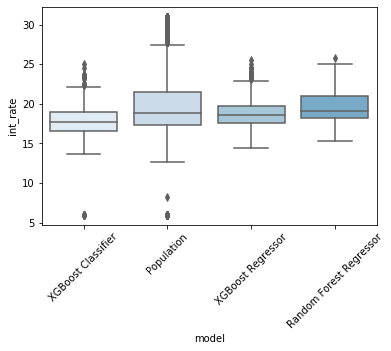

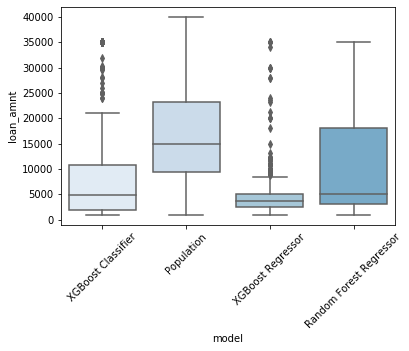

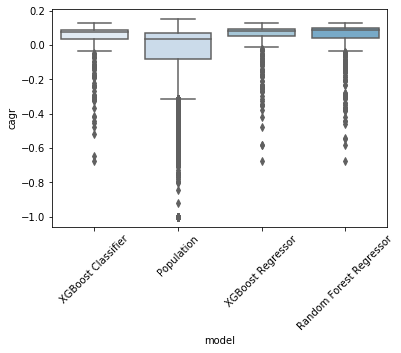

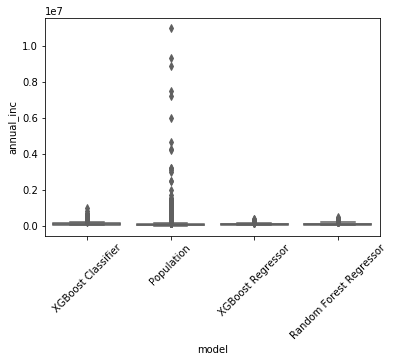

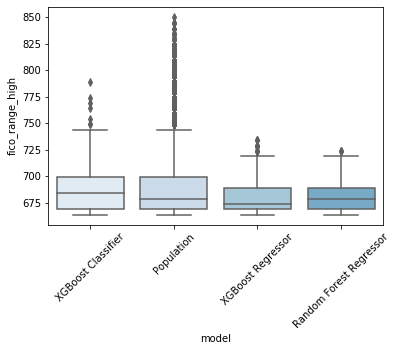

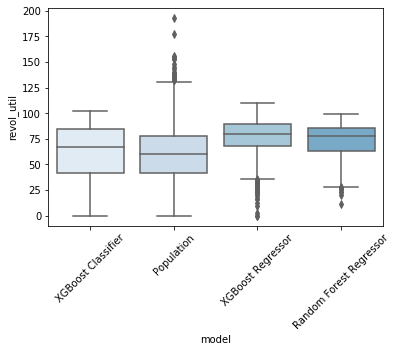

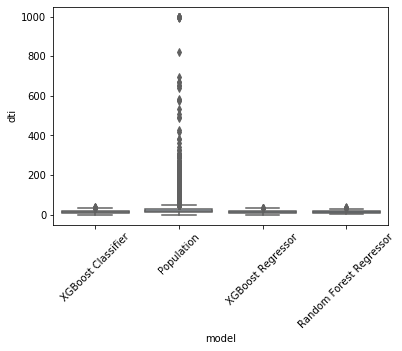

In [299]:
for i in ['int_rate','loan_amnt','cagr','annual_inc','fico_range_high','revol_util','dti']:
    plt.figure()
    chart = sns.boxplot(x = 'model', y = i, data = pools,palette = sns.color_palette("Blues", n_colors=7))
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


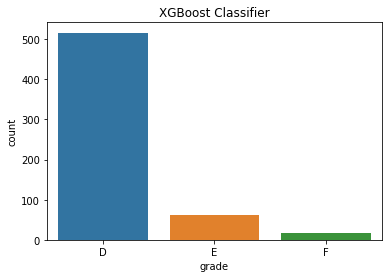

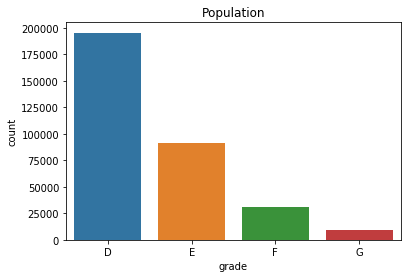

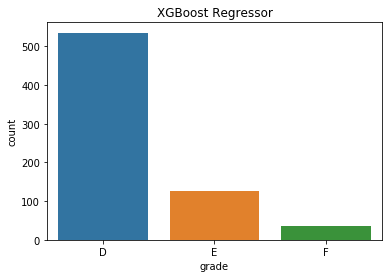

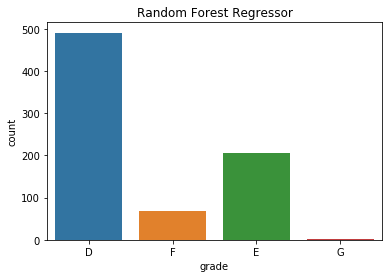

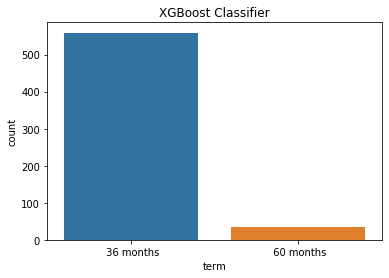

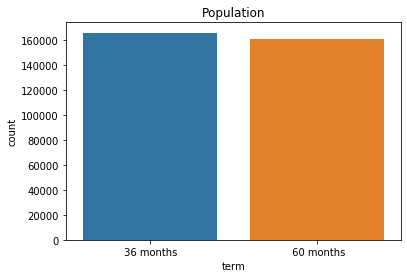

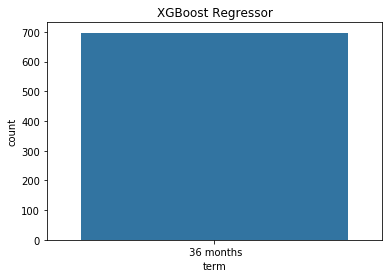

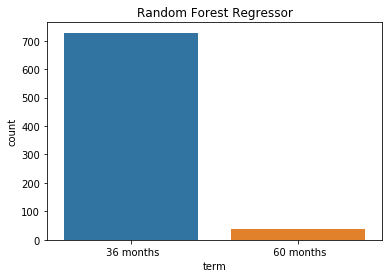

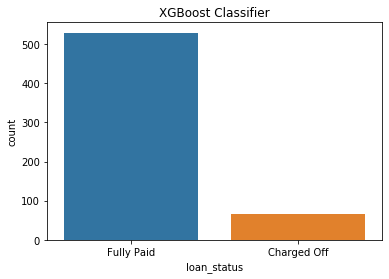

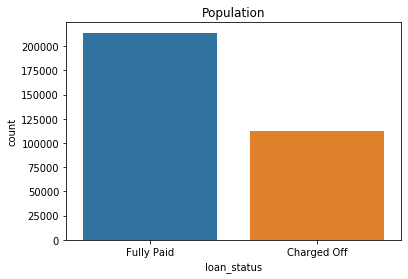

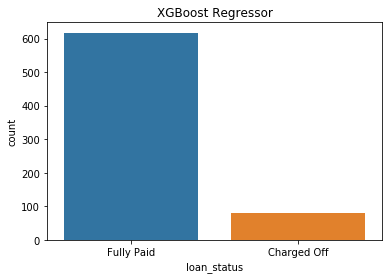

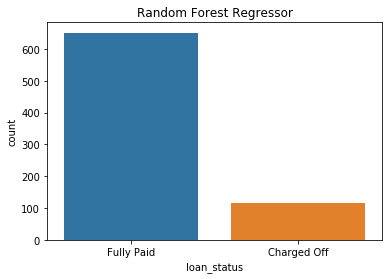

In [329]:
for i in ['grade','term','loan_status']:
    for x in ['XGBoost Classifier', 'Population', 'XGBoost Regressor', 'Random Forest Regressor']:
        plt.figure()
        sns.countplot(data = pools[pools['model'] == x], x = i).set_title(x)
        

In [ ]:
pools = pools.merge(data[['id','loan_amnt','annual_inc','installment','term','int_rate','grade','sub_grade','emp_length','home_ownership','loan_status','issue_d','addr_state','dti','fico_range_high','revol_util','total_pymnt','chargeoff_within_12_mths']])

In [326]:
 pools[pools['model'] == 'Population']

,cagr,id,model,loan_amnt,installment,term,int_rate,grade,sub_grade,emp_length,home_ownership,loan_status,issue_d,addr_state,dti,fico_range_high,revol_util,total_pymnt,chargeoff_within_12_mths,annual_inc
1,0.009320,37840324,Population,1125.0,40.19,36 months,17.14,D,D4,3 years,RENT,Fully Paid,Dec-2014,AR,26.98,719.0,78.3,1156.750000,0.0,23000.0
3,0.002807,36039529,Population,1300.0,45.70,36 months,15.99,D,D2,2 years,MORTGAGE,Fully Paid,Dec-2014,CA,13.95,674.0,15.8,1310.980000,0.0,16000.0
5,0.074406,37307656,Population,25000.0,533.96,60 months,6.00,D,D5,10+ years,RENT,Fully Paid,Dec-2014,OH,31.46,719.0,80.6,35791.742160,0.0,65000.0
7,0.023247,36611144,Population,35000.0,899.09,60 months,18.54,E,E1,10+ years,MORTGAGE,Fully Paid,Dec-2014,CA,15.18,724.0,35.9,39261.780000,0.0,400000.0
9,0.083913,36280959,Population,1000.0,35.40,36 months,16.49,D,D3,2 years,RENT,Fully Paid,Dec-2014,CA,26.66,664.0,97.2,1273.453487,0.0,28000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328710,0.005987,90805411,Population,32500.0,825.11,60 months,17.99,D,D2,10+ years,RENT,Fully Paid,Oct-2016,NJ,27.99,709.0,56.9,33484.615180,0.0,65000.0
328711,0.067929,90141265,Population,10400.0,284.23,60 months,21.49,D,D5,10+ years,MORTGAGE,Fully Paid,Oct-2016,IL,15.70,664.0,72.4,14445.908792,0.0,58000.0
328712,-0.114773,90726974,Population,16000.0,414.97,60 months,18.99,D,D3,4 years,MORTGAGE,Charged Off,Oct-2016,WI,9.22,669.0,53.1,8697.490000,0.0,69000.0
328713,0.011100,90855576,Population,28000.0,868.26,60 months,27.79,F,F5,8 years,RENT,Fully Paid,Oct-2016,CA,15.10,714.0,25.4,29588.883874,0.0,75000.0


In [ ]:
pools.groupby('model')['grade'].count()